In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from fact.io import read_h5py

exec(open('/home/msackel/Desktop/gammaClassification/programm/theta_cut/theta_cut.py').read())
exec(open('/home/msackel/Desktop/gammaClassification/programm/model_significance/model_significance.py').read())


with open('/home/msackel/Desktop/gammaClassification/config/feature.yaml') as f:
    feature = yaml.load(f)

mess_hadron= read_h5py(
    '/home/msackel/Desktop/gammaClassification/data/raw_data/crab_precuts.hdf5',
    key='events',
    columns=list(feature)+['theta_deg']
    )

mc_hadron= pd.read_hdf('/home/msackel/Desktop/gammaClassification/data/raw_data/proton_precuts.hdf5')[feature+['theta_deg']]

In [25]:
mess_hadron= mess_hadron.query('theta_deg>='+str(np.sqrt(0.5)))[:100000]
mc_hadron= mc_hadron.query('theta_deg>='+str(np.sqrt(0.5)))[:100000]
mess_hadron['label']=1
mc_hadron['label']=0
data = pd.concat([mess_hadron.drop('theta_deg', axis=1), mc_hadron.drop('theta_deg', axis=1)])
X_train, X_test, y_train, y_test = train_test_split(data.drop(['label'], axis=1), data.label, random_state=42)

In [26]:
Tree = RandomForestClassifier(max_depth=15,criterion='entropy', n_estimators=100, n_jobs=25)

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
selector = RFE(Tree, 1, step=1)
selector = selector.fit(X_train, y_train)
selector.support_ 

print('Ranking:', selector.ranking_)
print('Feature:', feature)

Ranking: [ 8  3  6 10  7  9  1 12 11  4  5  2]
Feature: ['conc_core', 'concentration_one_pixel', 'concentration_two_pixel', 'leakage', 'leakage2', 'size', 'width', 'num_islands', 'num_pixel_in_shower', 'ph_charge_shower_max', 'ph_charge_shower_mean', 'ph_charge_shower_variance']


In [27]:
['conc_core', 'concentration_one_pixel', 'concentration_two_pixel', 'leakage', 'leakage2', 'size', 'width', 'num_islands', 'num_pixel_in_shower', 'ph_charge_shower_max', 'ph_charge_shower_mean', 'ph_charge_shower_variance']

['conc_core',
 'concentration_one_pixel',
 'concentration_two_pixel',
 'leakage',
 'leakage2',
 'size',
 'width',
 'num_islands',
 'num_pixel_in_shower',
 'ph_charge_shower_max',
 'ph_charge_shower_mean',
 'ph_charge_shower_variance']

In [28]:
Tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=25, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

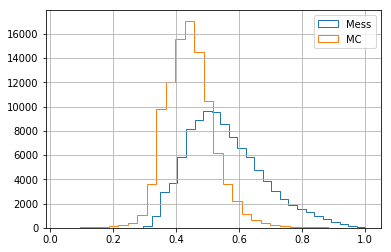

In [40]:
plt.hist(data.query('label==1')['pred'], bins=30, histtype='step', label='Mess')
plt.hist(data.query('label==0')['pred'], bins=30, histtype='step', label='MC')
plt.grid()
plt.legend()
plt.show()

In [31]:
data['pred'] = Tree.predict_proba(data.drop('label', axis=1))[:,1]

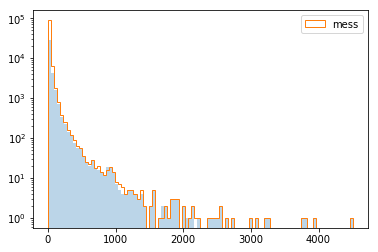

In [78]:
plt.hist(data.query('pred>=0.6').ph_charge_shower_max, alpha=0.3, bins=100)
plt.hist(data.query('label==1').ph_charge_shower_max, histtype='step', bins=100, label='mess')
plt.yscale('log')
plt.legend()
plt.show()

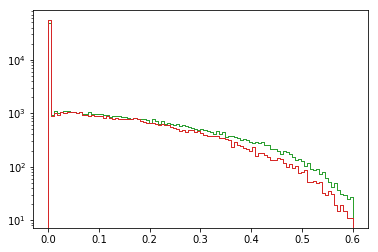

In [75]:
plt.hist(data.query('label==1').leakage, histtype='step', bins=100, label='mess')
plt.hist(data.query('label==0').leakage, histtype='step', bins=100, label='mess')
plt.yscale('log')
plt.show()